0.0 2.07
1.5 -0.2175000000000007
0.75 0.3581249999999996 1.5 -0.2175000000000007
iteration number = 1
0.75 0.3581249999999996 1.125 -0.07171875000000005
iteration number = 2
0.9375 0.10769531249999975 1.125 -0.07171875000000005
iteration number = 3
1.03125 0.009111328124999485 1.125 -0.07171875000000005
iteration number = 4
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
iteration number = 5
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
iteration number = 6
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
iteration number = 7
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
iteration number = 8
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
iteration number = 9
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
iteration number = 10
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
iteration number = 11
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.00

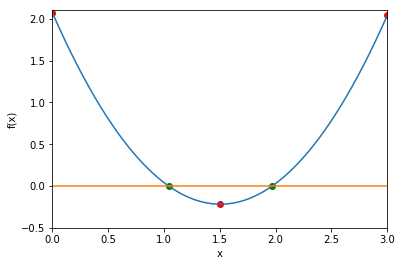

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def function_for_roots(x):
    a = 1.01
    b = -3.04
    c = 2.07
    return a*x**2 + b*x + c

def check_initial_values(f, x_min, x_max, tol):
    y_min = f(x_min)
    y_max = f(x_max)
    
    if ((y_min*y_max)>=0):     
        print('no zero crossing in this range', x_min, x_max)
        s = 'f(f%) = %f, f(f%) = %f' % (x_min, y_min, x_min, x_max)
        print(s)
        return 0
    
    if(np.fabs(y_min)< tol):
        return 1
    if (np.fabs(y_max)< tol):
        return 2
    return 3

def bisection_root_finding(f, x_min_start, x_max_start, tol):
    x_min = x_min_start
    x_max = x_max_start
    x_mid = 0.0
    
    y_min = f(x_min)
    y_max = f(x_max)
    y_mid = 0.0
    
    i_max = 10000
    i = 0
    
    flag = check_initial_values(f, x_min, x_max, tol)
    if (flag == 0):
        print('Error in bisection_root_finding().')
        raise ValueError('Initial values invalid', x_min, x_max)
    elif(flag == 1):
        return(x_min)
    elif(flag == 2):
        return(x_max)
    
    
    flag = 1
    
    while(flag):
        x_mid = .5*(x_min+x_max)
        y_mid = f(x_mid)
        
        if (np.fabs(y_mid) < tol):
            flag = 0
        else:
            if (f(x_mid)*(f(x_min))>0):
                x_min = x_mid
            else:
                x_max = x_mid
                
        print(x_min, f(x_min), x_max, f(x_max))
        
        
        i += 1
        
        if(i>=i_max):
            print("exceeded max number of iterations = ", i)
            s = "Min bracket f(%f) = %f" % (x_min, f(x_min))
            print(s)
            s = "Max bracket f(%f) = %f" % (x_max, f(x_max))
            print(s)
            s = "Mid bracket f(%f) = %f" % (x_mid, f(x_mid))
            print(s)
            raise StopIteration("Stopping iterations after ", i)
        print('iteration number = ' + str(i))
    return x_mid

#Root 1
x_min = 0.0
x_max = 1.5
tolerance = 1.0e-6

print(x_min, function_for_roots(x_min))
print(x_max, function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots, x_min, x_max, tolerance)
y_root = function_for_roots(x_root)

s = 'Root found with y(%f) = %f' % (x_root, y_root)
print(s)

#Root 2
x_min = 1.5
x_max = 3.0
tolerance = 1.0e-6

print(x_min, function_for_roots(x_min))
print(x_max, function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots, x_min, x_max, tolerance)
y_root = function_for_roots(x_root)

s = 'Root found with y(%f) = %f' % (x_root, y_root)
print(s)

x = np.linspace(0, 3, 1000)

points = [0.0, 1.5, 3.0]
roots = [1.040869, 1.969032]

plt.ylim(-0.5, 2.1)
plt.xlim(0, 3)

y = 1.01 * x ** 2 - 3.04 * x + 2.07
plt.plot(x, y)
plt.plot(x, 0 * x)

plt.scatter(points, [function_for_roots(x) for x in points], color='red')
plt.scatter(roots, [function_for_roots(x) for x in roots], color='green')

plt.ylabel('f(x)')
plt.xlabel('x')

plt.show()